# **DATA EXPLORATION & CLEANING**




 Step-1: Explore the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


Step-2: Load Your Data

In [ ]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

print("📊 Dataset loaded successfully!")
print(f"Total records: {len(df)}")
print(f"Total columns: {len(df.columns)}")


📊 Dataset loaded successfully!
Total records: 4269
Total columns: 13


Step-3: Check Data Structure

In [ ]:
# Display first few rows
print("🔍 First 5 rows of data:\n")
print(df.head())


print("\n📋 Column names and types:\n")
print(df.info())

🔍 First 5 rows of data:

   loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22

Step-4: Check for Missing Values

In [ ]:
# Check missing values
print("🔍 Missing Values Analysis:\n")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_data = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_percent.values
})

print(missing_data[missing_data['Missing_Count'] > 0])

if missing_data['Missing_Count'].sum() == 0:
    print("✅ No missing values found! Data is clean!")
else:
    print(f"\n⚠️ Total missing values: {missing_data['Missing_Count'].sum()}")

🔍 Missing Values Analysis:

Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found! Data is clean!


Step-5: Statistical Summary

In [ ]:
# Statistical summary
print("📊 Statistical Summary:\n")
print(df.describe())

print("\n" + "="*50)
print("\n📈 Value Counts for Categorical Columns:\n")

# Education
print("\n🎓 Education Distribution:")
print(df['education'].value_counts())

# Self Employed
print("\n👔 Self Employed Distribution:")
print(df['self_employed'].value_counts())

# Loan Status (TARGET VARIABLE!)
print("\n🎯 Loan Status Distribution (TARGET):")
print(df['loan_status'].value_counts())
print(f"\nApproval Rate: {(df['loan_status'].value_counts(normalize=True)['Approved']*100):.2f}%")

📊 Statistical Summary:

           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401         

 Step-6: Create Visualizations

✅ Visualization saved as 'loan_analysis_overview.png'


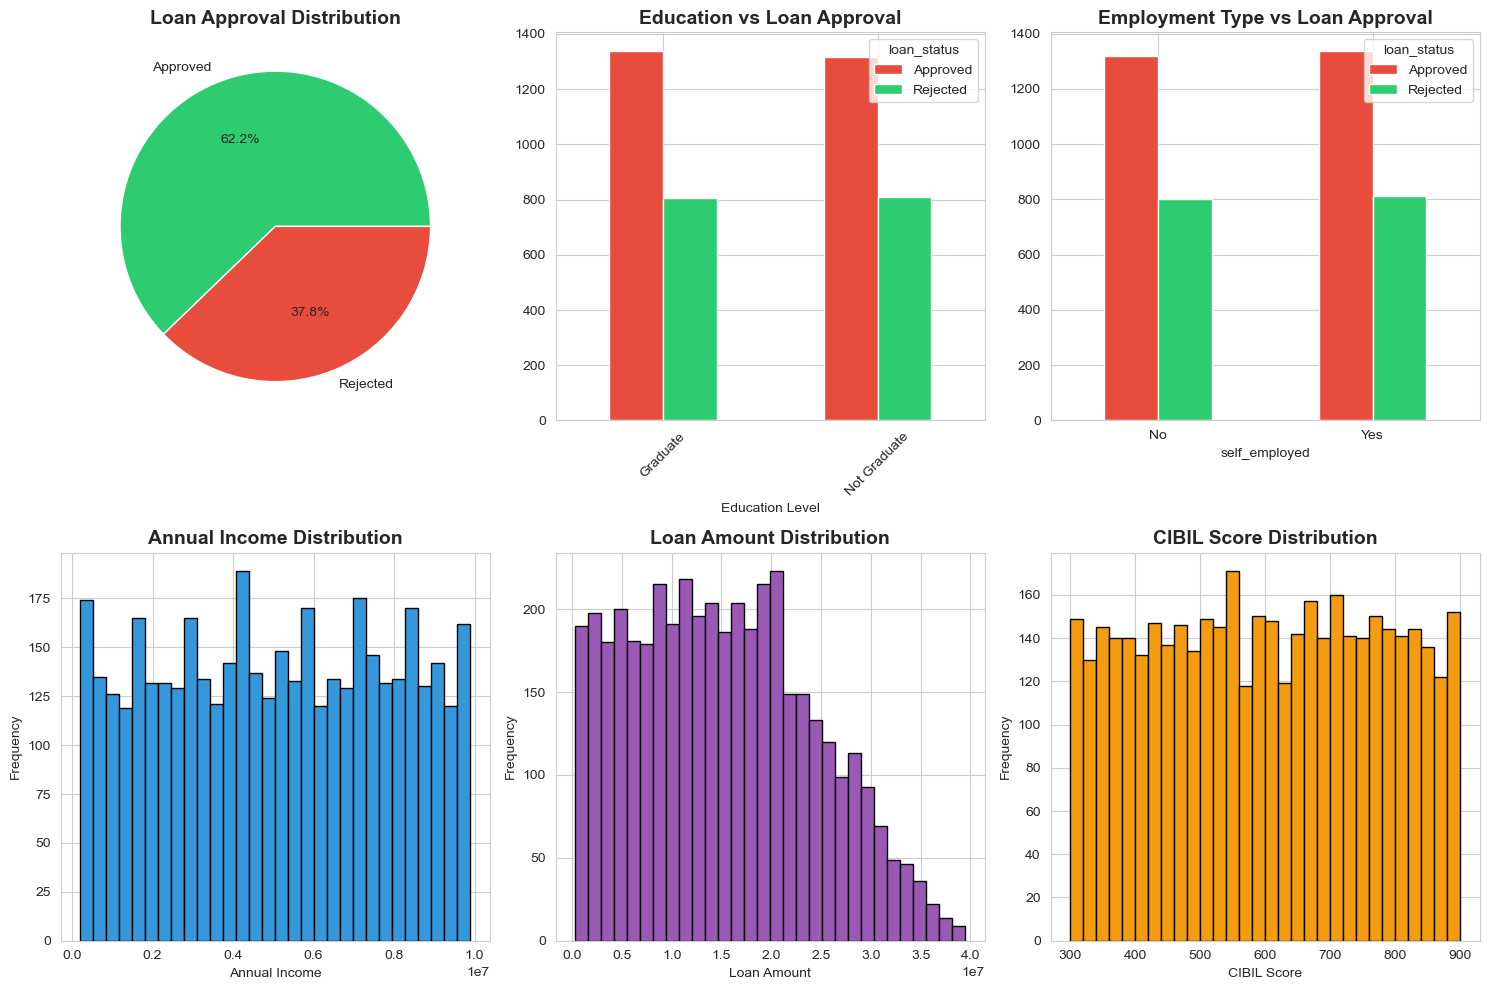

In [ ]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# 1. Loan Status Distribution
ax1 = plt.subplot(2, 3, 1) # Assign to ax1
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], ax=ax1)
plt.title('Loan Approval Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')

# 2. Education vs Loan Status
ax2 = plt.subplot(2, 3, 2) # Assign to ax2
pd.crosstab(df['education'], df['loan_status']).plot(kind='bar', color=['#e74c3c', '#2ecc71'], ax=ax2)
plt.title('Education vs Loan Approval', fontsize=14, fontweight='bold')
plt.xlabel('Education Level')
plt.xticks(rotation=45)

# 3. Self Employed vs Loan Status
ax3 = plt.subplot(2, 3, 3) # Assign to ax3
pd.crosstab(df['self_employed'], df['loan_status']).plot(kind='bar', color=['#e74c3c', '#2ecc71'], ax=ax3)
plt.title('Employment Type vs Loan Approval', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# 4. Income Distribution
ax4 = plt.subplot(2, 3, 4) # Change to 2, 3 grid and spot 4
df['income_annum'].plot(kind='hist', bins=30, color='#3498db', edgecolor='black', ax=ax4)
plt.title('Annual Income Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income')

# 5. Loan Amount Distribution
ax5 = plt.subplot(2, 3, 5) # Change to 2, 3 grid and spot 5
df['loan_amount'].plot(kind='hist', bins=30, color='#9b59b6', edgecolor='black', ax=ax5)
plt.title('Loan Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Loan Amount')

# 6. CIBIL Score Distribution
ax6 = plt.subplot(2, 3, 6) # Change to 2, 3 grid and spot 6
df['cibil_score'].plot(kind='hist', bins=30, color='#f39c12', edgecolor='black', ax=ax6)
plt.title('CIBIL Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('CIBIL Score')

plt.tight_layout()
plt.savefig('loan_analysis_overview.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved as 'loan_analysis_overview.png'")
plt.show()

Step-7: Key Insights Analysis

In [ ]:
# Calculate key metrics
print("🎯 KEY INSIGHTS:\n")
print("="*60)

# 1. Overall Approval Rate
approval_rate = (df['loan_status'] == 'Approved').mean() * 100
print(f"1. Overall Loan Approval Rate: {approval_rate:.2f}%")

# 2. Average CIBIL Score by Loan Status
print("\n2. Average CIBIL Score:")
cibil_by_status = df.groupby('loan_status')['cibil_score'].mean()
print(cibil_by_status)

# 3. Average Income by Loan Status
print("\n3. Average Annual Income:")
income_by_status = df.groupby('loan_status')['income_annum'].mean()
print(income_by_status)

# 4. Average Loan Amount by Status
print("\n4. Average Loan Amount:")
loan_by_status = df.groupby('loan_status')['loan_amount'].mean()
print(loan_by_status)

# 5. Approval Rate by Education
print("\n5. Approval Rate by Education:")
education_approval = df.groupby('education')['loan_status'].apply(lambda x: (x=='Approved').mean()*100)
print(education_approval)

# 6. Approval Rate by Employment Type
print("\n6. Approval Rate by Employment Type:")
employment_approval = df.groupby('self_employed')['loan_status'].apply(lambda x: (x=='Approved').mean()*100)
print(employment_approval)

# 7. Income to Loan Ratio
df['income_to_loan_ratio'] = df['income_annum'] / df['loan_amount']
print("\n7. Average Income-to-Loan Ratio:")
ratio_by_status = df.groupby('loan_status')['income_to_loan_ratio'].mean()
print(ratio_by_status)

print("\n" + "="*60)
print("✅ Analysis Complete!")

🎯 KEY INSIGHTS:

1. Overall Loan Approval Rate: 62.22%

2. Average CIBIL Score:
loan_status
Approved    703.461973
Rejected    429.468072
Name: cibil_score, dtype: float64

3. Average Annual Income:
loan_status
Approved    5.025904e+06
Rejected    5.113825e+06
Name: income_annum, dtype: float64

4. Average Loan Amount:
loan_status
Approved    1.524725e+07
Rejected    1.494606e+07
Name: loan_amount, dtype: float64

5. Approval Rate by Education:
education
Graduate        62.453358
Not Graduate    61.976471
Name: loan_status, dtype: float64

6. Approval Rate by Employment Type:
self_employed
No     62.199151
Yes    62.232558
Name: loan_status, dtype: float64

7. Average Income-to-Loan Ratio:
loan_status
Approved    0.344530
Rejected    0.357774
Name: income_to_loan_ratio, dtype: float64

✅ Analysis Complete!


Step-8: Save Your Cleaned Data

In [ ]:
# Create new features
df['total_assets'] = (df['residential_assets_value'] +
                      df['commercial_assets_value'] +
                      df['luxury_assets_value'] +
                      df['bank_asset_value'])

df['income_to_loan_ratio'] = df['income_annum'] / df['loan_amount']

# Save cleaned data
df.to_csv('loan_data_cleaned.csv', index=False)
print("✅ Cleaned data saved as 'loan_data_cleaned.csv'")
print("✅ Visualization saved as 'loan_analysis_overview.png'")


✅ Cleaned data saved as 'loan_data_cleaned.csv'
✅ Visualization saved as 'loan_analysis_overview.png'
